In [1]:
#eeg signal analysis using deep learning for a RSVP task
from glob import glob
import os
import mne # to analyse eeg dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

276 3 Idling EEG (eyes open)
277 4 Idling EEG (eyes closed)
768 6 Start of a trial
769 7 Cue onset left (class 1)
770 8 Cue onset right (class 2)
771 9 Cue onset foot (class 3)
772 10 Cue onset tongue (class 4)
1023 1 Rejected trial
1072 2 Eye movements
32766 5 Start of a new run

In [2]:
raw=mne.io.read_raw_gdf('D:/TARP 2.0/motorimg/A01T.gdf',eog=['EOG-left', 'EOG-central', 'EOG-right'])

Extracting EDF parameters from D:\TARP 2.0\motorimg\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...


c:\Users\Admin\miniconda3\lib\contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [3]:
 raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

<RawGDF | A01T.gdf, 22 x 672528 (2690.1 s), ~26 kB, data not loaded>

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


C:\Users\Admin\AppData\Local\Temp\ipykernel_2336\477516612.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=100)
c:\Users\Admin\miniconda3\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


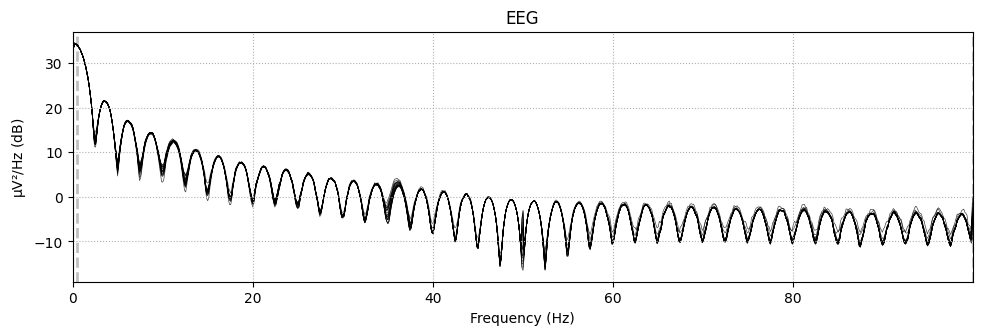

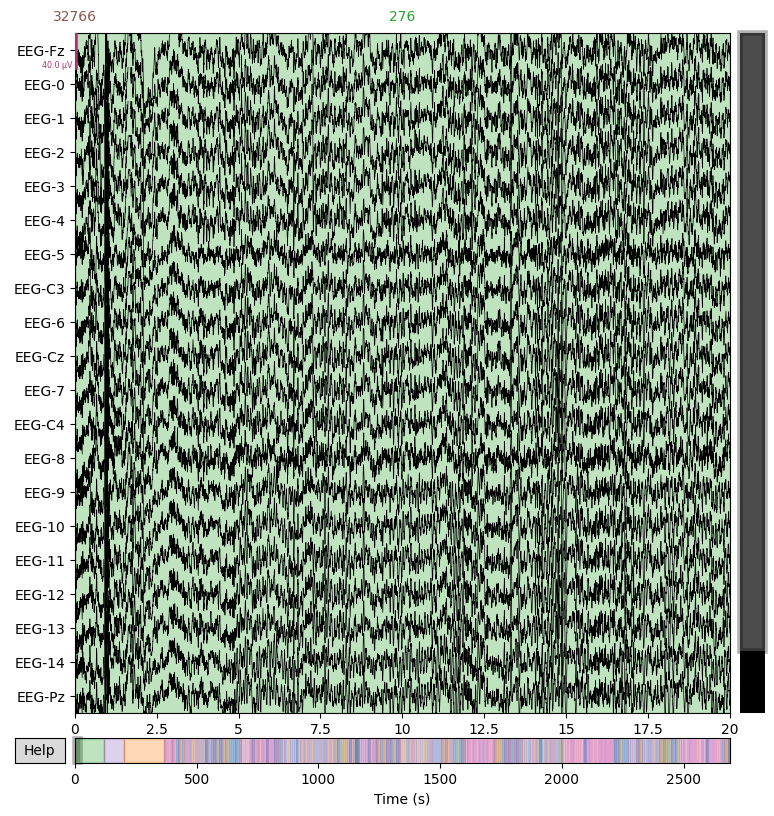

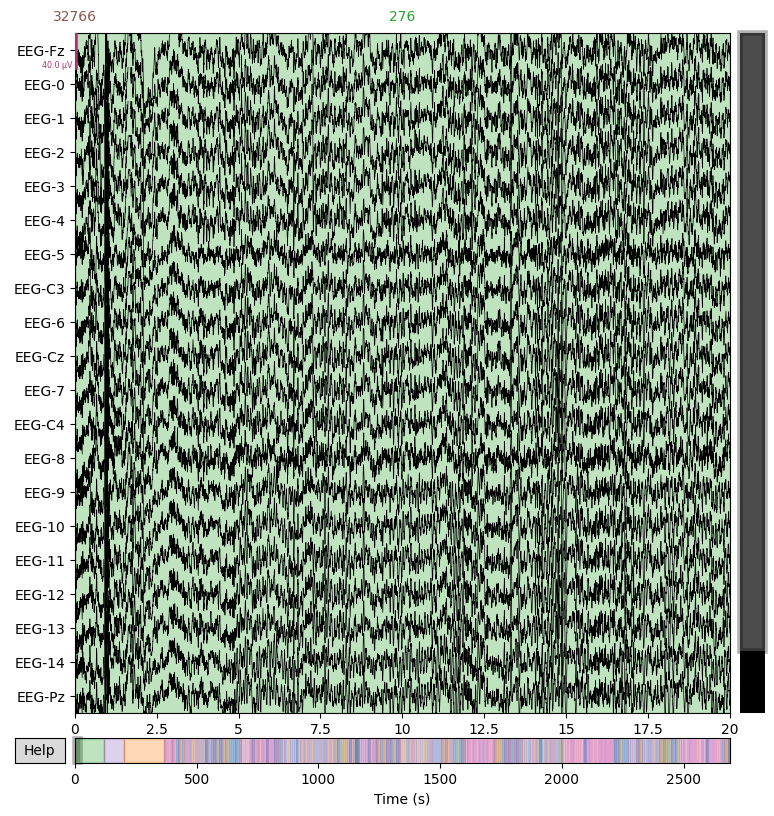

In [6]:
raw.plot_psd(fmax=100)
raw.plot(duration=20, n_channels=20)
#cerebrum 30-50hz respossible for movements


In [5]:
events=mne.events_from_annotations(raw)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']


In [6]:
events

(array([[     0,      0,      5],
        [     0,      0,      3],
        [ 29683,      0,      5],
        ...,
        [670550,      0,      6],
        [670550,      0,      1],
        [671050,      0,      7]]),
 {'1023': 1,
  '1072': 2,
  '276': 3,
  '277': 4,
  '32766': 5,
  '768': 6,
  '769': 7,
  '770': 8,
  '771': 9,
  '772': 10})

In [7]:
events[0][0:20]

array([[     0,      0,      5],
       [     0,      0,      3],
       [ 29683,      0,      5],
       [ 29683,      0,      4],
       [ 49955,      0,      5],
       [ 49955,      0,      2],
       [ 91518,      0,      5],
       [ 91868,      0,      6],
       [ 92368,      0,     10],
       [ 93871,      0,      6],
       [ 94371,      0,      9],
       [ 95789,      0,      6],
       [ 96289,      0,      8],
       [ 97741,      0,      6],
       [ 98241,      0,      7],
       [ 99749,      0,      6],
       [100249,      0,      7],
       [101860,      0,      6],
       [102360,      0,      8],
       [103777,      0,      6]])

In [8]:
event_dict={
'reject':1,
'eye move':2,
'eye open':3,
'eye close':4,
'new run':5,
'new trial':6,
'class 1':7,
'class 2':8,'class 3':9,
'class 4':10,
}

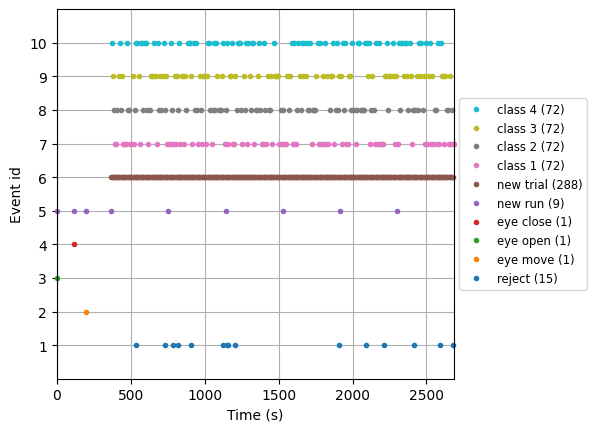

In [9]:
fig=mne.viz.plot_events(events[0],event_id=event_dict,sfreq=raw.info['sfreq'],first_samp=raw.first_samp)

In [10]:
epoch=mne.Epochs(raw,events[0],event_id=[7,8,9,10])

Not setting metadata
288 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


In [11]:
epoch.get_data().shape

Loading data for 288 events and 176 original time points ...
0 bad epochs dropped


(288, 22, 176)

In [12]:
label=epoch.events[:,-1]

In [13]:
epoch['8']

evoked_0 = epoch['7'].average()
evoked_1 = epoch['8'].average()
evoked_2 = epoch['9'].average()
evoked_3 = epoch['10'].average()

In [14]:
evoked_0

<Evoked | '7' (average, N=72), -0.2 – 0.5 sec, baseline -0.2 – 0 sec, 22 ch, ~56 kB>

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


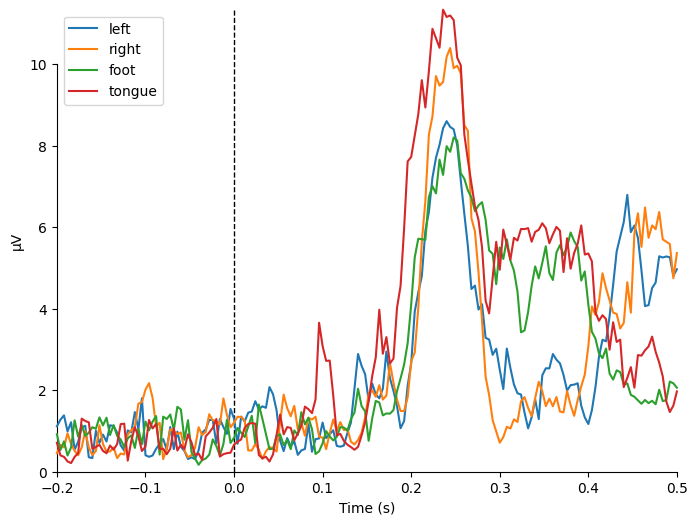

[<Figure size 800x600 with 1 Axes>]

In [48]:
#left,right,foot,tongue
dicts={'left':evoked_0,'right':evoked_1,'foot':evoked_2,'tongue':evoked_3}
mne.viz.plot_compare_evokeds(dicts)

In [15]:
#function to combine all function to one array
def read_data(path):
  raw=mne.io.read_raw_gdf(path,preload=True,eog=['EOG-left', 'EOG-central', 'EOG-right'])
  raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])
  raw.set_eeg_reference()
  events=mne.events_from_annotations(raw)
  epochs = mne.Epochs(raw, events[0], event_id=[7,8,9,10],on_missing ='warn')
  labels=epochs.events[:,-1]
  features=epochs.get_data()
  return features,labels

In [43]:
#features,labels=read_data('D:/TARP 2.0/motorimg/A02E.gdf')

Extracting EDF parameters from D:\TARP 2.0\motorimg\A02E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 662665  =      0.000 ...  2650.660 secs...


c:\Users\Admin\miniconda3\lib\contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '783']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 176 original time points ...
0 bad epochs dropped


C:\Users\Admin\AppData\Local\Temp\ipykernel_20216\2113060816.py:7: RuntimeWarning: No matching events found for 8 (event id 8)
  epochs = mne.Epochs(raw, events[0], event_id=[7,8,9,10],on_missing ='warn')
C:\Users\Admin\AppData\Local\Temp\ipykernel_20216\2113060816.py:7: RuntimeWarning: No matching events found for 9 (event id 9)
  epochs = mne.Epochs(raw, events[0], event_id=[7,8,9,10],on_missing ='warn')
C:\Users\Admin\AppData\Local\Temp\ipykernel_20216\2113060816.py:7: RuntimeWarning: No matching events found for 10 (event id 10)
  epochs = mne.Epochs(raw, events[0], event_id=[7,8,9,10],on_missing ='warn')


In [16]:
%%capture
features,labels,groups=[],[],[]
for i in range(1,10):
  feature,label=read_data(f'D:/TARP 2.0/motorimg/A0{i}T.gdf')
  features.append(feature)
  labels.append(label)
  groups.append([i]*len(label))

In [17]:
len(features)

9

In [18]:
len(groups)

9

In [19]:

features=np.concatenate(features)
labels=np.concatenate(labels)
groups=np.concatenate(groups)

features.shape,labels.shape,groups.shape

((2448, 22, 176), (2448,), (2448,))

In [25]:
labels

array([10,  9,  8, ...,  7,  8,  9])

In [21]:
len(features)

2448

In [22]:
groups

array([1, 1, 1, ..., 9, 9, 9])

In [20]:
df=pd.DataFrame(labels,groups)
df
df.to_csv("grplabel.csv")

ValueError: x and y can be no greater than 2D, but have shapes (288,) and (288, 22, 176)

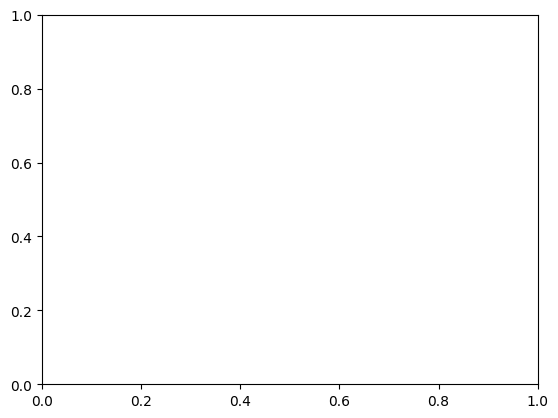

In [11]:
#fourier tranform 
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = 250*20
for i in range(len(features)):
  yf = fft(features[i])
  plt.plot(np.abs(yf))
plt.show()

In [2]:
frequencies = np.arange(7, 30, 3)
power = mne.time_frequency.tfr_morlet(epoch, n_cycles=200, return_itc=False,
                                      freqs=frequencies, decim=3)
power.plot(['EEG-Fz'])



NameError: name 'np' is not defined

[-5.37853547e-06 -6.31514769e-06 -6.33512283e-06 ... -1.84711314e-06
 -1.65402010e-06  3.06011343e-06]


In [29]:
!mkdir cwtplot

A subdirectory or file cwtplot already exists.


In [20]:
from glob import glob
import scipy.io
import torch.nn as nn
import torch
import numpy as np
import mne
from ssqueezepy import cwt
from ssqueezepy.visuals import plot, imshow
import os
import re
import pandas as pd

In [22]:
features[0].shape

(22, 176)

In [23]:
Wx, scales = cwt(features[0], 'morlet')
Wx.shape

(22, 195, 176)

In [24]:

plot(Wx[0])

c:\Users\Admin\miniconda3\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


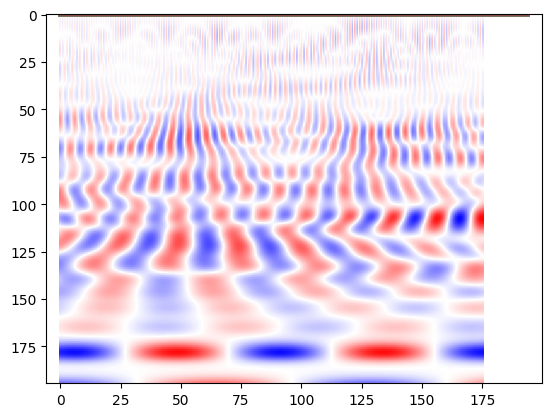

In [28]:
imshow(Wx[0])

In [25]:
from glob import glob
import scipy.io
import torch.nn as nn
import torch
import numpy as np
import mne
from ssqueezepy import cwt
from ssqueezepy.visuals import plot, imshow
import os
import re
import pandas as pd

In [26]:
count=0
for i in range(len(labels)):
    if(labels[i]==7):
        count=count+1

In [31]:
list1=[]
for i in range(len(labels)):
   if(labels[i]==7):
       list1.append(i)

In [32]:
len(list1)

648

In [27]:
import csv
import numpy as np
for i in range(len(labels)):
   if(labels[i]==7):
       list1.append(i)
       Wx, scales = cwt(features[i], 'gmw')
       for i in range(len(labels)):
         Wx[i]=np.abs(Wx)
         if Wx.ndim == 3:
         Wx = Wx[:,:,4]
       with open('D:/tarp 12/left hand.csv', mode='w', newline='') as file:
       writer = csv.writer(file)
       for row in Wx:
        writer.writerow(row)

IndentationError: expected an indented block after 'if' statement on line 9 (3985597371.py, line 10)

In [56]:
import csv
import numpy as np
for i in range(len(labels)):
   if(labels[i]==7):
       list1.append(i)
       Wx, scales = cwt(features[i], 'gmw')
       for i in range(len(labels)):
         Wx[i]=np.abs(Wx)
         if Wx.ndim == 3:
         Wx = Wx[:,:,4]
       with open('D:/tarp 12/left hand.csv', mode='w', newline='') as file:
       writer = csv.writer(file)
       for row in Wx:
        writer.writerow(row)

   if(labels[i]==8):
       list1.append(i)
       Wx, scales = cwt(features[i], 'morlet')
       Wx=np.abs(Wx)
       if Wx.ndim == 3:
          Wx = Wx[:,:,4]
       path=os.path.join('D:/scalogram_npy',f'feature_{labels[i]}/',)
       os.makedirs(path,exist_ok=True)
       path=path+f'trial_{i}.npy'
       np.save(path, Wx)
   if(labels[i]==9):
       list1.append(i)
       Wx, scales = cwt(features[i], 'morlet')
       Wx=np.abs(Wx)
       if Wx.ndim == 3:
          Wx = Wx[:,:,4]
       path=os.path.join('D:/scalogram_npy',f'feature_{labels[i]}/',)
       os.makedirs(path,exist_ok=True)
       path=path+f'trial_{i}.npy'
       np.save(path, Wx)
   if(labels[i]==10):
       list1.append(i)
       Wx, scales = cwt(features[i], 'morlet')
       Wx=np.abs(Wx)
       if Wx.ndim == 3:
          Wx = Wx[:,:,4]
       path=os.path.join('D:/scalogram_npy',f'feature_{labels[i]}/',)
       os.makedirs(path,exist_ok=True)
       path=path+f'trial_{i}.npy'
       np.save(path, Wx)

KeyboardInterrupt: 

CNN

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('D:/splittedimg/train_set/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2058 images belonging to 4 classes.


In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
testing_set = train_datagen.flow_from_directory('D:/splittedimg/test_set/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 390 images belonging to 4 classes.


In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('D:/splittedimg/test_set/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 390 images belonging to 4 classes.


In [11]:
cnn = tf.keras.models.Sequential()

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [13]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [15]:
cnn.add(tf.keras.layers.Flatten())

In [16]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [17]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [18]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
65/65 [==============================] - 39s 551ms/step - loss: 0.5662 - accuracy: 0.7422 - val_loss: 0.5624 - val_accuracy: 0.7500
Epoch 2/25
65/65 [==============================] - 11s 165ms/step - loss: 0.5624 - accuracy: 0.7500 - val_loss: 0.5624 - val_accuracy: 0.7500
Epoch 3/25
65/65 [==============================] - 12s 179ms/step - loss: 0.5624 - accuracy: 0.7500 - val_loss: 0.5624 - val_accuracy: 0.7500
Epoch 4/25
65/65 [==============================] - 11s 173ms/step - loss: 0.5624 - accuracy: 0.7500 - val_loss: 0.5624 - val_accuracy: 0.7500
Epoch 5/25
65/65 [==============================] - 11s 174ms/step - loss: 0.5623 - accuracy: 0.7500 - val_loss: 0.5624 - val_accuracy: 0.7500
Epoch 6/25
65/65 [==============================] - 12s 186ms/step - loss: 0.5623 - accuracy: 0.7500 - val_loss: 0.5624 - val_accuracy: 0.7500
Epoch 7/25
65/65 [==============================] - 16s 249ms/step - loss: 0.5623 - accuracy: 0.7500 - val_loss: 0.5624 - val_accuracy: 0.7500

In [21]:
import numpy as np
import tensorflow as tf
test_image = tf.keras.preprocessing.image.load_img('D:/splittedimg/test_set/feature_10/trial_2136.png', target_size=(64, 64))
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
training_set.class_indices
# 




1/1 [==============================] - 0s 38ms/step


IndexError: index 1 is out of bounds for axis 0 with size 1

In [23]:
print(result)
result.shape

[[0.]]


(1, 1)

In [57]:
test_image

array([[[[ 68.,   3.,  87.],
         [ 69.,   8.,  91.],
         [ 70.,  12.,  95.],
         ...,
         [ 68.,   3.,  87.],
         [ 70.,   9.,  92.],
         [ 72.,  29., 111.]],

        [[ 68.,   3.,  87.],
         [ 69.,   8.,  91.],
         [ 70.,  12.,  95.],
         ...,
         [ 68.,   3.,  87.],
         [ 70.,   9.,  92.],
         [ 72.,  29., 111.]],

        [[ 68.,   3.,  87.],
         [ 69.,   8.,  91.],
         [ 70.,  12.,  95.],
         ...,
         [ 68.,   3.,  87.],
         [ 70.,   9.,  92.],
         [ 72.,  29., 111.]],

        ...,

        [[ 68.,   3.,  87.],
         [ 69.,   8.,  91.],
         [ 70.,  14.,  97.],
         ...,
         [ 68.,   2.,  85.],
         [ 69.,   8.,  91.],
         [ 72.,  25., 107.]],

        [[ 68.,   3.,  87.],
         [ 69.,   8.,  91.],
         [ 70.,  14.,  97.],
         ...,
         [ 68.,   2.,  85.],
         [ 69.,   8.,  91.],
         [ 72.,  25., 107.]],

        [[ 68.,   3.,  87.],
       